### Name: Vedant Bhagwat Puri
### PRN: 202302040011
### Rollno: 78
### Batch: T2


## Lab Assignment-5 Time Series Forecasting using LSTM
## Experiment 5.1:
## Objective:
## To forecast future values of a univariate time series using LSTM-based models.

In [ ]:
df = pd.read_csv("seattle-weather.csv")  # adjust name if needed
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
# Print the available columns to inspect their names
print(df.columns)
# Assuming the temperature column is named 'temp_max', change accordingly
df = df[['temp_max']]  # univariate series, adjust 'temp_max' if needed
df.dropna(inplace=True)


Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')


In [ ]:
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [ ]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(scaled_data, seq_length)

# Split into train and test
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]


In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0845 - val_loss: 0.0105
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0097 - val_loss: 0.0095
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0087 - val_loss: 0.0094
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0095 - val_loss: 0.0090
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0077 - val_loss: 0.0093
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0081 - val_loss: 0.0087
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0079 - val_loss: 0.0096
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0077 - val_loss: 0.0087
Epoch 9/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0074 - val_loss: 0.0084
Epoch 10/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0078 - val_loss: 0.0087
Epoch 11/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0077 - val_loss: 0.0084
Epoch 12/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0078 - val_loss: 0.

In [ ]:
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y_test)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


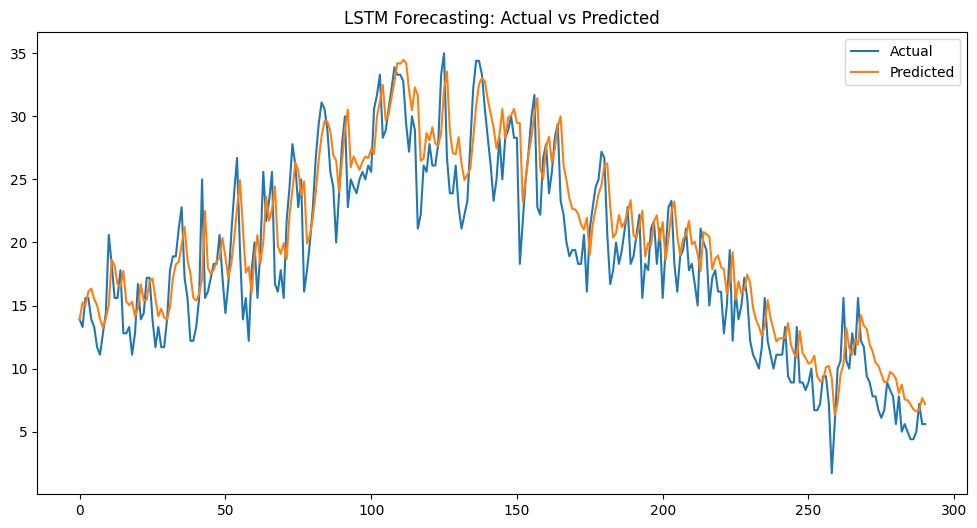

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(actual, label='Actual')
plt.plot(predicted, label='Predicted')
plt.title('LSTM Forecasting: Actual vs Predicted')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error # Import necessary functions

rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 3.22400636542606
MAE: 2.555714930373778


# Experiment 5.2: Sequence Text Prediction using LSTM
# Objective:
# To generate next characters/words based on a given input sequence using LSTM.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_folder = '/content/drive/MyDrive/harrypotter'  # adjust based on your folder structure


In [ ]:
# STEP 1: Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from google.colab import drive

In [ ]:
# STEP 2: Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# STEP 3: Load Dataset from Google Drive
# 🔁 Change this path to where your `.txt` files are stored
data_folder = '/content/drive/MyDrive/harrypotter'

In [ ]:
# Read all files and combine text
text = ""
for filename in sorted(os.listdir(data_folder)):
    if filename.endswith(".txt"):
        with open(os.path.join(data_folder, filename), encoding='utf-8') as f:
            text += f.read().lower().replace('\n', ' ')

print("Total characters in text:", len(text))

Total characters in text: 6285438


In [ ]:
# STEP 4: Character Tokenization
chars = sorted(list(set(text)))
char2idx = {char: idx for idx, char in enumerate(chars)}
idx2char = {idx: char for idx, char in enumerate(chars)}

encoded_text = [char2idx[c] for c in text]

In [ ]:
# STEP 5: Create Sequences
seq_length = 60  # Define how many characters per input sequence
X = []
y = []

for i in range(seq_length, len(encoded_text)):
    X.append(encoded_text[i - seq_length:i])
    y.append(encoded_text[i])

X = np.array(X)
y = to_categorical(y, num_classes=len(chars))

In [ ]:
# (Optional: Use subset for faster training during demo)
# X = X[:50000]
# y = y[:50000]

# STEP 6: Build LSTM Model
model = Sequential()
model.add(Embedding(len(chars), 50, input_length=seq_length))  # Embedding layer
model.add(LSTM(256, return_sequences=False))  # LSTM layer
model.add(Dense(len(chars), activation='softmax'))  # Output layer with softmax activation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# STEP 7: Train the Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Create callbacks (optional, but recommended for larger datasets)
early_stopping = EarlyStopping(monitor='val_loss', patience=3) # Stop training if validation loss doesn't improve for 3 epochs
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True) # Save the best performing model

# (Optional: Subset the data for faster initial training)
subset_size = 50000  # Adjust as needed
X_subset = X[:subset_size]
y_subset = y[:subset_size]

# Train the model
history = model.fit(X_subset, y_subset,
                    batch_size=256,
                    epochs=15,
                    callbacks=[early_stopping, model_checkpoint], # Apply callbacks
                    validation_split=0.2)  # Split data for validation (20%)

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 735ms/step - accuracy: 0.1850 - loss: 3.1982

157/157 ━━━━━━━━━━━━━━━━━━━━ 130s 804ms/step - accuracy: 0.1852 - loss: 3.1963 - val_accuracy: 0.2922 - val_loss: 2.5484
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 742ms/step - accuracy: 0.2929 - loss: 2.5037

157/157 ━━━━━━━━━━━━━━━━━━━━ 142s 809ms/step - accuracy: 0.2930 - loss: 2.5034 - val_accuracy: 0.3111 - val_loss: 2.3555
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 737ms/step - accuracy: 0.3177 - loss: 2.3306

157/157 ━━━━━━━━━━━━━━━━━━━━ 143s 816ms/step - accuracy: 0.3177 - loss: 2.3304 - val_accuracy: 0.3357 - val_loss: 2.2551
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 744ms/step - accuracy: 0.3424 - loss: 2.2265

157/157 ━━━━━━━━━━━━━━━━━━━━ 137s 875ms/step - accuracy: 0.3425 - loss: 2.2264 - val_accuracy: 0.3622 - val_loss: 2.1728
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 738ms/step - accuracy: 0.3687 - loss: 2.1437

157/157 ━━━━━━━━━━━━━━━━━━━━ 126s 802ms/step - accuracy: 0.3687 - loss: 2.1435 - val_accuracy: 0.3870 - val_loss: 2.1073
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 762ms/step - accuracy: 0.3956 - loss: 2.0606

157/157 ━━━━━━━━━━━━━━━━━━━━ 130s 828ms/step - accuracy: 0.3956 - loss: 2.0605 - val_accuracy: 0.4125 - val_loss: 2.0493
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 747ms/step - accuracy: 0.4143 - loss: 1.9902

157/157 ━━━━━━━━━━━━━━━━━━━━ 139s 808ms/step - accuracy: 0.4143 - loss: 1.9901 - val_accuracy: 0.4167 - val_loss: 1.9997
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 753ms/step - accuracy: 0.4336 - loss: 1.9174

157/157 ━━━━━━━━━━━━━━━━━━━━ 139s 884ms/step - accuracy: 0.4336 - loss: 1.9174 - val_accuracy: 0.4281 - val_loss: 1.9578
Epoch 9/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 747ms/step - accuracy: 0.4529 - loss: 1.8563

157/157 ━━━━━━━━━━━━━━━━━━━━ 131s 816ms/step - accuracy: 0.4529 - loss: 1.8563 - val_accuracy: 0.4339 - val_loss: 1.9228
Epoch 10/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 749ms/step - accuracy: 0.4716 - loss: 1.8006

157/157 ━━━━━━━━━━━━━━━━━━━━ 152s 881ms/step - accuracy: 0.4716 - loss: 1.8006 - val_accuracy: 0.4434 - val_loss: 1.8897
Epoch 11/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 748ms/step - accuracy: 0.4797 - loss: 1.7535

157/157 ━━━━━━━━━━━━━━━━━━━━ 128s 818ms/step - accuracy: 0.4797 - loss: 1.7535 - val_accuracy: 0.4520 - val_loss: 1.8649
Epoch 12/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 758ms/step - accuracy: 0.4882 - loss: 1.7252

157/157 ━━━━━━━━━━━━━━━━━━━━ 153s 889ms/step - accuracy: 0.4883 - loss: 1.7252 - val_accuracy: 0.4627 - val_loss: 1.8319
Epoch 13/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 742ms/step - accuracy: 0.5013 - loss: 1.6757

157/157 ━━━━━━━━━━━━━━━━━━━━ 127s 811ms/step - accuracy: 0.5013 - loss: 1.6758 - val_accuracy: 0.4715 - val_loss: 1.8116
Epoch 14/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 740ms/step - accuracy: 0.5077 - loss: 1.6484

157/157 ━━━━━━━━━━━━━━━━━━━━ 151s 872ms/step - accuracy: 0.5077 - loss: 1.6484 - val_accuracy: 0.4724 - val_loss: 1.7922
Epoch 15/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 732ms/step - accuracy: 0.5186 - loss: 1.6196

157/157 ━━━━━━━━━━━━━━━━━━━━ 125s 798ms/step - accuracy: 0.5186 - loss: 1.6195 - val_accuracy: 0.4837 - val_loss: 1.7629


In [ ]:
# STEP 8: Plot Accuracy & Loss
print("\n=== Training Accuracy and Loss Plots ===")
plt.figure(figsize=(12, 4))


=== Training Accuracy and Loss Plots ===


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

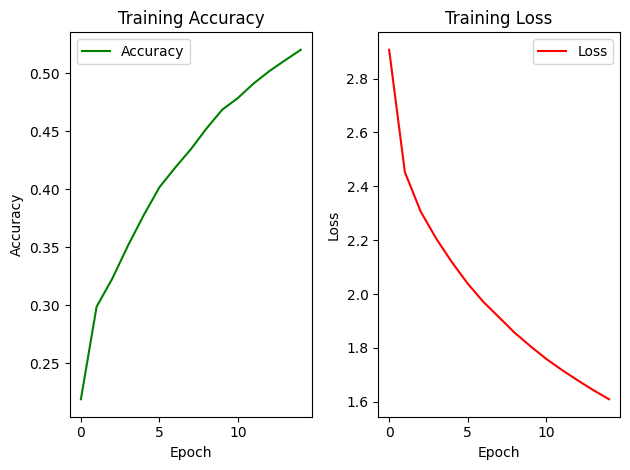

In [ ]:
# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Accuracy", color='green')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Loss", color='red')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# STEP 9: Generate Text Function
def generate_text(seed_text, next_chars=300):
    generated = seed_text
    for _ in range(next_chars):
        # Prepare input data for the LSTM
        encoded = [char2idx.get(c, 0) for c in generated[-seq_length:]]  # Get last 60 characters
        encoded = pad_sequences([encoded], maxlen=seq_length)  # Pad sequence to fit model input
        pred = model.predict(encoded, verbose=0)  # Predict next character probabilities
        next_char = idx2char[np.argmax(pred)]  # Get character with highest probability
        generated += next_char  # Add to the generated text
    return generated

In [ ]:
# STEP 10: Generate Sample Text
print("\n=== Auto-generated Text Sample ===")
seed = "harry looked at hermione and said "  # Provide seed text to start the generation
generated_text = generate_text(seed)
print(generated_text)


=== Auto-generated Text Sample ===
harry looked at hermione and said a lot the said a lot the said a lot the said a lot the said a lot the said a lot the said a lot the said a lot the said a lot the said a lot the said a lot the said a lot the said a lot the said a lot the said a lot the said a lot the said a lot the said a lot the said a lot the said a lot the said 


# Experiment 5.3: Sequence Text Classification using LSTM
# Objective:
# To classify text sequences using LSTM-based models

In [ ]:
!pip install tensorflow

In [ ]:
# STEP 1: Import Libraries (no need to mount drive)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer # Import Tokenizer from tensorflow.keras.preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences # Import pad_sequences from tensorflow.keras.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential # Import Sequential from tensorflow.keras.models
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout # Import layers from tensorflow.keras.layers

In [ ]:
# STEP 2: Load the Dataset from local upload
file_path = "tweets.csv"  # <<-- Corrected path
df = pd.read_csv(file_path)

# Show first few rows and column names
print(df.head())
print("\nAvailable columns:", df.columns)

   id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target  
0  Communal violence in Bhainsa, Telangana. "Ston...       1  
1  Telangana: Section 144 has been imposed in Bha...       1  
2  Arsonist sets cars ablaze at dealership https:...       1  
3  Arsonist sets cars ablaze at dealership https:...       1  
4  "Lord Jesus, your love brings freedom and pard...       0  

Available columns: Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')


In [ ]:
# STEP 3: Select & Rename Columns (adjust if needed)
df = df[['text', 'target']]  # if different, change accordingly
df.dropna(inplace=True)


<ipython-input-80-05a6047f9954>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
# STEP 4: Preprocess the Text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])

# Padding
max_len = 100
X = pad_sequences(sequences, maxlen=max_len)
y = df['target'].values


In [ ]:
# STEP 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# STEP 6: Build the LSTM Model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=64, input_length=max_len))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# STEP 7: Train the Model
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 24s 355ms/step - accuracy: 0.7639 - loss: 0.5624 - val_accuracy: 0.8126 - val_loss: 0.4086
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 377ms/step - accuracy: 0.8580 - loss: 0.3422 - val_accuracy: 0.8835 - val_loss: 0.3060
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 26s 447ms/step - accuracy: 0.9321 - loss: 0.1935 - val_accuracy: 0.8813 - val_loss: 0.3086
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 27s 467ms/step - accuracy: 0.9673 - loss: 0.1065 - val_accuracy: 0.8808 - val_loss: 0.3505
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 34s 347ms/step - accuracy: 0.9809 - loss: 0.0695 - val_accuracy: 0.8692 - val_loss: 0.4214


In [ ]:
# STEP 8: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy * 100:.2f}%")

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.8885 - loss: 0.3600

✅ Test Accuracy: 88.04%
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step


In [ ]:
# STEP 9: Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Disaster", "Disaster"]))


📊 Classification Report:
              precision    recall  f1-score   support

Not Disaster       0.93      0.92      0.93      1878
    Disaster       0.65      0.69      0.67       396

    accuracy                           0.88      2274
   macro avg       0.79      0.81      0.80      2274
weighted avg       0.88      0.88      0.88      2274



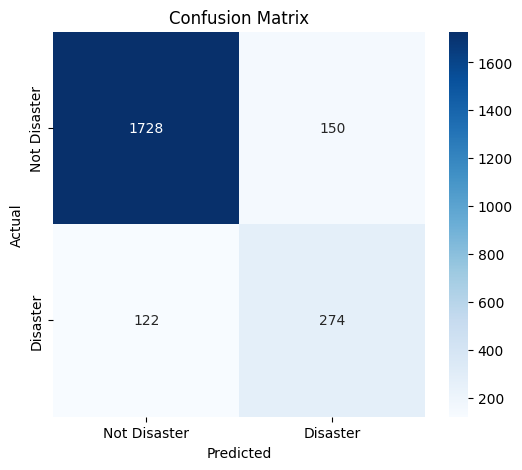

In [ ]:
# STEP 10: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Disaster", "Disaster"], yticklabels=["Not Disaster", "Disaster"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

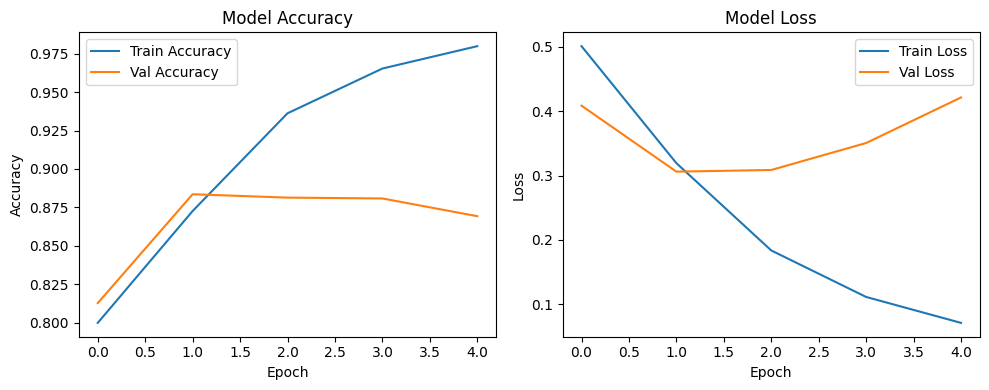

In [ ]:
# STEP 11: Plot Training Accuracy and Loss
plt.figure(figsize=(10,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


# Declaration

I, Vedant Puri, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:
GitHub Repository Link:

Signature: Vedant Puri
